# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, I gathered **all** three pieces of data for this project and loaded them in the notebook.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import time
import sys
import os
import json
import io
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from tweepy import OAuthHandler
from timeit import default_timer as timer

%matplotlib inline

import warnings; warnings.simplefilter('ignore')

### Read first data from project directory (Twitter archived enhanced that is a csv file) into Dataframe.

In [2]:
# read twitter-archive-enhanced.csv from directory to DataFrame
df_arc = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Extract tweet_id from url

In [4]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# saving the obtained data
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Import the tweet image predictions TSV file into a DataFrame
df_img = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


###  Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
tweet_ids = df_arc.tweet_id.values
len(tweet_ids)

2356

In [7]:
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [8]:
df_twt = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])
df_twt.head(25)

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data
In this section, I documented **fourteen (14) quality issues and six (6) tidiness issues** in the Assessment summary below.

The data is assessed:
**Visually and Programmatically**

* Visually: Within this Jupyter Notebook and in Excel (an external application)
* Programmatically: Using pandas functions

### Checking the three DataFrames

##### _Visual_

In [9]:
# head data of the archieved twitter data
df_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df_arc.text.sample(20)

1230    Here we see an extremely rare Bearded Floofmal...
2330    Unique dog here. Very small. Lives in containe...
2090    This is Creg. You offered him a ride to work b...
1514    Happy Saturday here's a dog in a mailbox. 12/1...
1286    RT if you are as ready for summer as this pup ...
1318    This is Oliver (pronounced "Ricardo"). He's a ...
518     This is Pavlov. His floatation device has fail...
2061    This is Herm. It's his first day of potty trai...
1251    Meet Milo and Amos. They are the best of pals....
1610    For the last time, WE. DO. NOT. RATE. BULBASAU...
53      This is Rey. He's a Benebop Cumberfloof. 12/10...
1353    When you're trying to watch your favorite tv s...
728     RT @dog_rates: This is Harper. She scraped her...
1475    Meet Freddery. He's a Westminster Toblerone. S...
581     RT @dog_rates: This is Sampson. He's about to ...
541     RT @dog_rates: This is Dave. He's currently in...
1357    This pupper doesn't understand gates. 10/10 so...
458     Looks 

In [11]:
# image data
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
# head data from twitter API
df_twt.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Quality
###### Archive (df_arc) Table

* Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp, and expanded_urls.
* Column name floofer should be spelled 'floof'

###### Image_pred (df_img) Table
* The type of dogs in columns p1, p2 and p3 had some uppercase and lowerccase letters

#### Tidiness
* The column text had multiple variables like a url link, rating, and some tweets represented two dogs.
* The tweet_count and archive table should be merged as this is related data.

##### _Programmatic_

In [13]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> * __tweet_id__ has dtype int64 and should be object
> * __timestamp__ should be a datetime64 dtype type as well

In [14]:
doggo = df_arc.doggo.value_counts()
floofer = df_arc.floofer.value_counts()
pupper = df_arc.pupper.value_counts()
puppo = df_arc.puppo.value_counts()
print(doggo); 
print(floofer); 
print(pupper); 
print(puppo)

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


> * Missing information for the dog stages.

In [15]:
df_arc.name.value_counts().head(20)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Penny       10
Tucker      10
Bo           9
Winston      9
the          8
Sadie        8
Buddy        7
Toby         7
Bailey       7
an           7
Daisy        7
Bella        6
Oscar        6
Name: name, dtype: int64

> * Many missing names from the list under 'None', and random names like 'a' and 'an' might be parts of strings that got taken out of context.

In [16]:
df_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

> * The source column looks messy and clutters the table

In [17]:
df_twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id_str            2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


> * The column __id_str__ should be changed to __tweet_id__ so merging tables will be smoother.

In [18]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> * The __tweet_id__ column should be dtype object instead of int64.

### Assessment Summary

#### Quality Issues

#### Archive Table (df_arc)
1. Missing values in columns: __in_reply_to_status_id__, __in_reply_to_user_id__, __retweeted_status_id__, __retweeted_status_user_id__, __retweeted_status_timestamp__, and __expanded_urls__.
2. Column name __floofer__ should be spelled __'floof'__ (but entire column values can be left as floofer)
3. __tweet_id__ has dtype int64 and should be object
4. __timestamp__ should be a datetime64 dtype type as well
5. Missing information for dog stages.
6. Many missing names from the list under __'Name'__, and random names like __'a'__ and __'an'__ might be parts of strings that got taken out of context.
7. Remove from table retweets and replies keepng only original tweets.
8. Some tweets had __"\&amp"__ combined with ";" which is the html code to display just the ampersand, so that needs to be cleaned up.
9. Some records have more than one dog stage
10. Rating_numerator column has values less than 10 (e.g 0, 7) as well as some very large numbers (e.g. 130, 110)
11. Rating_denominator column has values way other than 10 (way higher than 10)

#### Image prediction table (df_img)
1. The types of dogs in columns __p1__, __p2__, and __p3__ had some uppercase and lowercase letters.
2. The __tweet_id__ column should be dtype object instead of int64.

#### Tweet count table (df_twt)
1. The column __id_str__ should be changed to __tweet_id__ so merging tables will be smoother.

#### Tidiness Issues
1. The __tweet_count(df_twt)__  data (retweet_count and favorite_count) should be merged into the __twitter-archive-enhanced(df_arc)__ table as it is the added data for the __twitter-archive-enhanced__ table.
2. The __source__ column in the twitter-archive-enhanced table looks messy and clutters the table.
3. __doggo__, __floofer__, __pupper__, __puppo__ columns in __twitter_archive_enhanced__ table should be in one column named __Stage__.
4.  __df_arc__ without any duplicates (i.e. retweets) will have empty __retweeted_status_id__, __retweeted_status_user_id__ and __retweeted_status_timestamp__ columns, which can be dropped.
5. __"Breed"__ column should be added in __df_arc__ table; its values based on __p1_conf__ and __p1_dog__ columns of __df_img__ (image predictions) table
6. All three tables will eventually be merged into one.

## Cleaning Data
In this section, I cleaned **all** the issues I documented while assessing. 

I also noted to make copies of each table first before cleaning.

In [19]:
# Make copies of original pieces of data
arc_cl = df_arc.copy()
img_cl = df_img.copy()
twt_cl = df_twt.copy()

### Issue #1: Some columns have missing values are some columns are not neccessary in my future analysis.

#### Define: 
Delete retweets and observations without ID, columns with missing values and delete unncessary columns: __'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'in_reply_to_status_id', 'source', 'expanded_urls', 'in_reply_to_user_id'.__

#### Code

In [20]:
arc_cl=arc_cl[df_arc.tweet_id.notnull()]
arc_cl=arc_cl[df_arc.retweeted_status_id.isnull()]
arc_cl=arc_cl.drop(['in_reply_to_status_id', 'source', 'expanded_urls', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

#### Test

In [21]:
arc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


### Issue #2: There are ratings that do not have images, I only want ratings with images. 

#### Define
I would delete oobservations without images.

#### Code

In [22]:
arc_cl.tweet_id=arc_cl.tweet_id.astype(str)
image_id=arc_cl[['tweet_id']]
arc_cl=pd.merge(arc_cl,image_id,on='tweet_id')

#### Test

In [23]:
arc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(2), object(8)
memory usage: 186.9+ KB


### Issue #3: Fix some column names
* twt_cl: unify column names
* arc_cl: fix column names

#### Define
* In the twt_cl table, the column name id_str would be changed to tweet_id using the rename() function.
* In the arc_cl table, column name floofer should be "floof" to match the dog stage associated with it using the rename() function.
* The columns rating_numerator and rating_denominator should be shortend to "rate_num" and "rate_denom" to make it less wordy.

#### Code

In [24]:
twt_cl.rename(index=str, columns={"id_str": "tweet_id"}, inplace=True)
arc_cl.rename(columns={"floofer": "floof", 
                                         "rating_numerator": "rate_num",
                                         "rating_denominator": "rate_denom"}, inplace=True)

#### Test

In [25]:
twt_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


In [26]:
arc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 10 columns):
tweet_id      2175 non-null object
timestamp     2175 non-null object
text          2175 non-null object
rate_num      2175 non-null int64
rate_denom    2175 non-null int64
name          2175 non-null object
doggo         2175 non-null object
floof         2175 non-null object
pupper        2175 non-null object
puppo         2175 non-null object
dtypes: int64(2), object(8)
memory usage: 186.9+ KB


### Issue #4: Fixing Datatypes.
* img_cl: tweet_id dtype "string"
* arc_cl: timestamp dtype "datetime"
* arc_cl: tweet_id dtype "string"

#### Define
* In the img_cl table, I would change the dtype of the tweet_id column from int64 to object using the astype() function.
* In the arc_cl table, I would change the dtype of the timestamp column from object to datetime using pandas to_datetime() function.
* In the arc_cl table, I would change the dtype of the tweet_id column from int64 to object using the astype() function.

#### Code

In [27]:
img_cl['tweet_id'] = img_cl['tweet_id'].astype('str')
arc_cl['timestamp'] = pd.to_datetime(arc_cl['timestamp'])
arc_cl['tweet_id'] = arc_cl['tweet_id'].astype('str')

#### Test

In [28]:
img_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [29]:
arc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 10 columns):
tweet_id      2175 non-null object
timestamp     2175 non-null datetime64[ns]
text          2175 non-null object
rate_num      2175 non-null int64
rate_denom    2175 non-null int64
name          2175 non-null object
doggo         2175 non-null object
floof         2175 non-null object
pupper        2175 non-null object
puppo         2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 186.9+ KB


### Issue #5: Uniform the dog breeds
* Img_cl dataframe

#### Define
* In the img_cl table, all the names of the dogbreeds in the __p1, p2, and p3__ would be converted to lowercase letters.

#### Code

In [30]:
img_cl['p1'] = img_cl['p1'].str.lower()
img_cl['p2'] = img_cl['p2'].str.lower()
img_cl['p3'] = img_cl['p3'].str.lower()

#### Test

In [31]:
img_cl.p1.head()

0    welsh_springer_spaniel
1                   redbone
2           german_shepherd
3       rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [32]:
img_cl.p2.head()

0                collie
1    miniature_pinscher
2              malinois
3               redbone
4            rottweiler
Name: p2, dtype: object

In [33]:
img_cl.p3.head()

0      shetland_sheepdog
1    rhodesian_ridgeback
2             bloodhound
3     miniature_pinscher
4               doberman
Name: p3, dtype: object

### Issue #6: Clean up text column in arc_cl dataframe

#### Define
* In the arc_cl table, I would change the html ampersand code from "&amp ;" to "&" in the text column
* I would alos remove the "/n " the newline symbol
* and also remove ending url link.

#### Code

In [34]:
arc_cl['text'] = arc_cl.text.str.replace("&amp;", "&")
arc_cl['text'] = arc_cl.text.str.replace("\n", " ")
arc_cl['text'] = arc_cl.text.str.replace(r"http\S+", "")
arc_cl['text'] = arc_cl.text.str.strip()

#### Test

In [35]:
arc_cl.query("text == '&amp;'")

,tweet_id,timestamp,text,rate_num,rate_denom,name,doggo,floof,pupper,puppo


In [36]:
arc_cl.iloc[[588, 797, 853, 948, 985, 1005, 1136, 1234, 1239, 1278, 
                    1294, 1307, 1426, 1556, 1592, 1649, 1653, 1719, 1759, 
                    1811, 1860, 1922, 1960, 2005, 2014, 2047, 2076], [2,3,4,5]]

,text,rate_num,rate_denom,name
588,This is Sampson. He just graduated. Ready to b...,12,10,Sampson
797,This is Spanky. He was a member of the 2002 US...,12,10,Spanky
853,This is Lenox. She's in a wheelbarrow. Silly d...,10,10,Lenox
948,Say hello to Ollie. He conducts this train. He...,11,10,Ollie
985,This is Ivar. She is a badass Viking warrior. ...,10,10,Ivar
1005,This is Otis. Everybody look at Otis. 12/10 wo...,12,10,Otis
1136,Say hello to Katie. She's a Mitsubishi Hufflep...,12,10,Katie
1234,This dog is never sure if he's doing the right...,10,10,None
1239,This is Jessiga. She's a Tasmanian McCringlebe...,10,10,Jessiga
1278,This is just a beautiful pupper good shit evol...,12,10,just


### Issue #7: Fix the ratings columns in the arc_cl table

#### Define
* In the arc_cl table, I would use methods like such as extractall(), query(), contains(), etc to check for misextraction of the ratings.

#### Code

In [37]:
arc_cl.reset_index(inplace=True, drop=True)

In [38]:
arc_cl[arc_cl.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rate_num']]

,text,rate_num
42,This is Bella. She hopes her smile made you sm...,5
558,"This is Logan, the Chow who lived. He solemnly...",75
617,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1510,I've been told there's a slight possibility he...,5
1533,Here we have uncovered an entire battalion of ...,26


In [39]:
hyphen_table = arc_cl.text.str.extractall(r"(\d+\d*\/\d+)")
hyphen_table.head(10)

,,0
,match,
0,0,13/10
1,0,13/10
2,0,12/10
3,0,13/10
4,0,12/10
5,0,13/10
6,0,13/10
7,0,13/10
8,0,13/10


In [40]:
match_1 = hyphen_table.query("match == 1")
match_1.head()

,,0
,match,
52,1,13/10
263,1,13/10
619,1,11/10
832,1,7/10
890,1,14/10


In [41]:
match_1.index.labels

FrozenList([[52, 263, 619, 832, 890, 987, 1024, 1044, 1180, 1280, 1286, 1329, 1346, 1359, 1483, 1616, 1653, 1718, 1722, 1791, 1831, 1885, 1934, 1998, 2037, 2082, 2091, 2117, 2125, 2154], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [42]:
# copied indices from above
arc_cl.iloc[[52, 263, 619, 832, 890, 987, 1024, 1044, 1180, 1280, 
                    1286, 1329, 1346, 1359, 1483, 1616, 1653, 1718, 1722, 
                    1791, 1831, 1885, 1934, 1998, 2037, 2082, 2091, 2117, 
                    2125, 2154], [2,3,4,5]]

,text,rate_num,rate_denom,name
52,@roushfenway These are good dogs but 17/10 is ...,17,10,None
263,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,None
619,"""Yep... just as I suspected. You're not flossi...",12,10,None
832,This is Bookstore and Seaweed. Bookstore is ti...,10,10,Bookstore
890,"After so many requests, this is Bretagne. She ...",9,11,None
987,Happy 4/20 from the squad! 13/10 for all,4,20,None
1024,This is Bluebert. He just saw that both #Final...,50,50,Bluebert
1044,Meet Travis and Flurp. Travis is pretty chill ...,10,10,Travis
1180,This is Socks. That water pup w the super legs...,9,10,Socks
1280,This may be the greatest video I've ever been ...,4,10,None


In [43]:
#rating confused with 9/11(September 11th)
arc_cl.iloc[890, 3] = 14
arc_cl.iloc[890, 4] = 10

#rating confused with 4/20(Weed Day)
arc_cl.iloc[987, 3] = 13
arc_cl.iloc[987, 4] = 10

#rating confused with phrase 50/50 split
arc_cl.iloc[1024, 3] = 11
arc_cl.iloc[1024, 4] = 10

#rating confused with 7/11 which is name of convience store
arc_cl.iloc[1483, 3] = 10
arc_cl.iloc[1483, 4] = 10

#rating confused with 1/2 representing "half"
arc_cl.iloc[2154, 3] = 9
arc_cl.iloc[2154, 4] = 10

In [44]:
doubles_list = arc_cl.iloc[[52, 263, 619, 832, 1044, 1180, 1280, 
                    1286, 1329, 1346, 1359, 1616, 1653, 1718, 1722, 
                    1791, 1831, 1885, 1934, 1998, 2037, 2082, 2091, 2117, 
                    2125]]
double_index = doubles_list.index

In [45]:
arc_cl.iloc[[42, 558, 617, 1510, 1533], [2,3,4]]

,text,rate_num,rate_denom
42,This is Bella. She hopes her smile made you sm...,5,10
558,"This is Logan, the Chow who lived. He solemnly...",75,10
617,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1510,I've been told there's a slight possibility he...,5,10
1533,Here we have uncovered an entire battalion of ...,26,10


In [46]:
arc_cl.iloc[42, 3] = 13.5
arc_cl.iloc[558, 3] = 9.75
arc_cl.iloc[617, 3] = 11.27
arc_cl.iloc[1510, 3] = 9.5
arc_cl.iloc[1533, 3] = 11.26

#### Test

In [47]:
arc_cl.iloc[[42, 558, 617, 1510, 1533], [2,3,4]]

,text,rate_num,rate_denom
42,This is Bella. She hopes her smile made you sm...,13.50,10
558,"This is Logan, the Chow who lived. He solemnly...",9.75,10
617,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10
1510,I've been told there's a slight possibility he...,9.50,10
1533,Here we have uncovered an entire battalion of ...,11.26,10


In [48]:
arc_cl.iloc[[890, 987, 1024, 1483, 2154], [2,3,4,5]]

,text,rate_num,rate_denom,name
890,"After so many requests, this is Bretagne. She ...",14.0,10,None
987,Happy 4/20 from the squad! 13/10 for all,13.0,10,None
1024,This is Bluebert. He just saw that both #Final...,11.0,10,Bluebert
1483,This is Darrel. He just robbed a 7/11 and is i...,10.0,10,Darrel
2154,This is an Albanian 3 1/2 legged Episcopalian...,9.0,10,an


### Issue #8: Remove data with double ratings

#### Define
* In the arc_cl table, there are some tweets with two dogs being rated, therefore those will be dropped because it violates the rules of tidiness.

#### Code

In [49]:
doubles_list = arc_cl.iloc[[52, 263, 619, 832, 1044, 1180, 1280, 
                    1286, 1329, 1346, 1359, 1616, 1653, 1718, 1722, 
                    1791, 1831, 1885, 1934, 1998, 2037, 2082, 2091, 2117, 
                    2125]]
double_index = doubles_list.index

In [50]:
arc_cl.drop(axis='index', index=double_index, inplace=True)

#### Test

In [51]:
arc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2150 entries, 0 to 2174
Data columns (total 10 columns):
tweet_id      2150 non-null object
timestamp     2150 non-null datetime64[ns]
text          2150 non-null object
rate_num      2150 non-null float64
rate_denom    2150 non-null int64
name          2150 non-null object
doggo         2150 non-null object
floof         2150 non-null object
pupper        2150 non-null object
puppo         2150 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 184.8+ KB


### Issue #9: Some records have more than one dog

#### Define

* There is one record that has both doggo and floof
* There is another record that has both doggo and puppo. 
> For these 2 records, I would take a look at the text manually to decide one dog stage for each of them. If I find ambiguous texts, I would set both the column values as None or drop the rows.

* There are 10 records which have both doggo and pupper. I would also decide this from reading the text manually and setting the appropriate stage programmatically.

#### Code

In [52]:
# Defining a function aimed at creating a column with all stage

def Dog_Stage(row):
    # Defining a list to store the data
    stg_lst = []
    # Setting the conditional
    if row['doggo'] == 'doggo':
        # Adding the entry to the list if it satisfies the condition
        stg_lst.append('doggo')
    if row['floof'] == 'floofer':
        stg_lst.append('floofer')
    if row['pupper'] == 'pupper':
        stg_lst.append('pupper')
    if row['puppo'] == 'puppo':
        stg_lst.append('puppo')
    if len(stg_lst) < 1: 
        row['stage'] = 'None'
    else: 
        row['stage'] = ' and '.join(stg_lst)
    return row

In [53]:
arc_cl.floof.value_counts()

None       2140
floofer      10
Name: floof, dtype: int64

In [54]:
# Applying the "dog-stage" function to each record
arc_cl = arc_cl.apply(Dog_Stage, axis=1)

In [55]:
# Discarding unwanted entries
arc_cl = arc_cl.drop(['doggo', 'floof', 'pupper', 'puppo'], axis=1)

In [56]:
arc_cl.head()

,tweet_id,timestamp,text,rate_num,rate_denom,name,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,None


In [57]:
for ind, rw in arc_cl.iterrows():
    if ' and ' in rw['stage']:
        print (ind,rw['stage'],'\n','\n',
               rw['text'],'\n','\n')

165 doggo and puppo 
 
 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for 
 

172 doggo and floofer 
 
 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs 
 

382 doggo and pupper 
 
 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) 
 

442 doggo and pupper 
 
 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time 
 

467 doggo and pupper 
 
 Like doggo, like pupper version 2. Both 11/10 
 

474 doggo and pupper 
 
 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine 
 

567 doggo and pupper 
 
 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your aver

In [58]:
# Implementing the corrections manually
arc_cl.loc[arc_cl.index == 165, 'stage'] = 'puppo'
arc_cl.loc[arc_cl.index == 172, 'stage'] = 'floofer'
arc_cl.loc[arc_cl.index == 382, 'stage'] = 'doggo'
arc_cl.loc[arc_cl.index == 474, 'stage'] = 'pupper'
arc_cl.loc[arc_cl.index == 567, 'stage'] = 'doggo'
arc_cl.loc[arc_cl.index == 593, 'stage'] = 'pupper'
arc_cl.loc[arc_cl.index == 781, 'stage'] = np.NaN

In [59]:
# transform None in NaN
arc_cl['stage'] = arc_cl['stage'].replace(['None'], np.NaN)

#### Test

In [60]:
# Verifying the changes
arc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2150 entries, 0 to 2174
Data columns (total 7 columns):
tweet_id      2150 non-null object
timestamp     2150 non-null datetime64[ns]
text          2150 non-null object
rate_num      2150 non-null float64
rate_denom    2150 non-null int64
name          2150 non-null object
stage         341 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 134.4+ KB


In [61]:
arc_cl.stage.value_counts()

pupper              224
doggo                77
puppo                25
floofer              10
doggo and pupper      5
Name: stage, dtype: int64

##### Drop rows with double dog stages
* It is perceived as though they are two different dogs from my visual / manual investigation

In [62]:
arc_cl = arc_cl[arc_cl.stage != 'doggo and pupper']

In [63]:
arc_cl.stage.value_counts()

pupper     224
doggo       77
puppo       25
floofer     10
Name: stage, dtype: int64

In [64]:
arc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2145 entries, 0 to 2174
Data columns (total 7 columns):
tweet_id      2145 non-null object
timestamp     2145 non-null datetime64[ns]
text          2145 non-null object
rate_num      2145 non-null float64
rate_denom    2145 non-null int64
name          2145 non-null object
stage         336 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 134.1+ KB


#### Also drop name rows with __'a'__ as their names

In [65]:
arc_cl.name.value_counts()

None       665
a           55
Charlie     11
Lucy        11
Oliver      10
Cooper      10
Penny        9
Tucker       9
the          8
Lola         8
Sadie        8
Winston      8
Toby         7
Daisy        7
Bailey       6
Bo           6
Stanley      6
Bella        6
Jax          6
Koda         6
an           6
Oscar        6
Chester      5
Bentley      5
Leo          5
Rusty        5
Scout        5
Buddy        5
Dave         5
Milo         5
          ... 
Ace          1
Chloe        1
Dixie        1
Harry        1
Andru        1
Butters      1
Hamrick      1
all          1
my           1
Kellogg      1
Furzey       1
Pavlov       1
Ralphy       1
Theo         1
Tiger        1
Obi          1
Jim          1
Sailor       1
Shooter      1
Kollin       1
Stuart       1
Tilly        1
Grey         1
Rey          1
Leonard      1
Chuq         1
Tino         1
Chubbs       1
Chelsea      1
Colin        1
Name: name, Length: 945, dtype: int64

In [66]:
arc_cl = arc_cl[arc_cl.name != 'a']

In [67]:
arc_cl.name.value_counts()

None       665
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Winston      8
Sadie        8
Lola         8
the          8
Toby         7
Daisy        7
Bo           6
Koda         6
Bailey       6
Bella        6
an           6
Oscar        6
Stanley      6
Jax          6
Bentley      5
Dave         5
Buddy        5
Milo         5
Louis        5
Rusty        5
Chester      5
Scout        5
Leo          5
          ... 
Ron          1
Burt         1
Ace          1
Chloe        1
Traviss      1
all          1
Miley        1
Chelsea      1
Dale         1
Hamrick      1
my           1
Kellogg      1
Furzey       1
Pavlov       1
Ralphy       1
Theo         1
Tiger        1
Obi          1
Jim          1
Sailor       1
Shooter      1
Kollin       1
Stuart       1
Tilly        1
Rey          1
Leonard      1
Chuq         1
Tino         1
Chubbs       1
Colin        1
Name: name, Length: 944, dtype: int64

### Issue #10: MERGE

#### Define
* Take both the arc_cl and twt_cl tables and merge into one table using the join() method on the columns tweet_id.

#### Code

In [68]:
arc_cl.head(3)

,tweet_id,timestamp,text,rate_num,rate_denom,name,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN


In [69]:
twt_cl.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [70]:
twt_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


In [71]:
tweet_data = arc_cl.join(twt_cl.set_index('tweet_id'), on='tweet_id')

#### Test

In [72]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2174
Data columns (total 9 columns):
tweet_id          2090 non-null object
timestamp         2090 non-null datetime64[ns]
text              2090 non-null object
rate_num          2090 non-null float64
rate_denom        2090 non-null int64
name              2090 non-null object
stage             332 non-null object
retweet_count     2090 non-null int64
favorite_count    2090 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 163.3+ KB


### Issue #11: FINAL MERGE

#### Define
* Take the newly tweet_data table and combine with the img_cl table using the same join() method on the tweet_id column.

#### Code

In [73]:
comp_twt_data = tweet_data.join(img_cl.set_index('tweet_id'), on='tweet_id')

#### Test

In [74]:
comp_twt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2174
Data columns (total 20 columns):
tweet_id          2090 non-null object
timestamp         2090 non-null datetime64[ns]
text              2090 non-null object
rate_num          2090 non-null float64
rate_denom        2090 non-null int64
name              2090 non-null object
stage             332 non-null object
retweet_count     2090 non-null int64
favorite_count    2090 non-null int64
jpg_url           1912 non-null object
img_num           1912 non-null float64
p1                1912 non-null object
p1_conf           1912 non-null float64
p1_dog            1912 non-null object
p2                1912 non-null object
p2_conf           1912 non-null float64
p2_dog            1912 non-null object
p3                1912 non-null object
p3_conf           1912 non-null float64
p3_dog            1912 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(11)
memory usage: 342.9+ KB


In [75]:
comp_twt_data

,tweet_id,timestamp,text,rate_num,rate_denom,name,stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10,None,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,NaN,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10,None,NaN,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,NaN,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


### Issue #12: Removing missing Data

#### Define
* Removing the missing rows from the merged tables using the drop() method.

#### Code

In [76]:
comp_twt_data_cc = comp_twt_data.copy()

In [77]:
drop_index = comp_twt_data_cc[pd.isnull(comp_twt_data_cc['jpg_url'])].index
drop_index2 = comp_twt_data_cc[pd.isnull(comp_twt_data_cc['retweet_count'])].index
drop_index, drop_index2

(Int64Index([  29,   33,   39,   61,   68,   76,   81,   98,  101,  117,
             ...
             1665, 1716, 1726, 1735, 1737, 1761, 1859, 1970, 2010, 2033],
            dtype='int64', length=178), Int64Index([], dtype='int64'))

In [78]:
comp_twt_data_cc.drop(index=drop_index, inplace=True)
comp_twt_data_cc.drop(index=drop_index2, inplace=True)

#### Test

In [79]:
comp_twt_data_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912 entries, 0 to 2174
Data columns (total 20 columns):
tweet_id          1912 non-null object
timestamp         1912 non-null datetime64[ns]
text              1912 non-null object
rate_num          1912 non-null float64
rate_denom        1912 non-null int64
name              1912 non-null object
stage             294 non-null object
retweet_count     1912 non-null int64
favorite_count    1912 non-null int64
jpg_url           1912 non-null object
img_num           1912 non-null float64
p1                1912 non-null object
p1_conf           1912 non-null float64
p1_dog            1912 non-null object
p2                1912 non-null object
p2_conf           1912 non-null float64
p2_dog            1912 non-null object
p3                1912 non-null object
p3_conf           1912 non-null float64
p3_dog            1912 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(11)
memory usage: 313.7+ KB


## Storing Data
* Here I saved the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv"

In [80]:
comp_twt_data_cc.to_csv(path_or_buf='twitter_archive_master.csv', index=False)

In [81]:
comp_twt_data_cl = comp_twt_data_cc[['timestamp','tweet_id', 'rate_num', 'rate_denom', 
                            'name', 'retweet_count', 'favorite_count', 'p1', 'p2', 'p3']]

In [82]:
comp_twt_data_cl

,timestamp,tweet_id,rate_num,rate_denom,name,retweet_count,favorite_count,p1,p2,p3
0,2017-08-01 16:23:56,892420643555336193,13.0,10,Phineas,8853,39467,orange,bagel,banana
1,2017-08-01 00:17:27,892177421306343426,13.0,10,Tilly,6514,33819,chihuahua,pekinese,papillon
2,2017-07-31 00:18:03,891815181378084864,12.0,10,Archie,4328,25461,chihuahua,malamute,kelpie
3,2017-07-30 15:58:51,891689557279858688,13.0,10,Darla,8964,42908,paper_towel,labrador_retriever,spatula
4,2017-07-29 16:00:24,891327558926688256,12.0,10,Franklin,9774,41048,basset,english_springer,german_short-haired_pointer
5,2017-07-29 00:08:17,891087950875897856,13.0,10,None,3261,20562,chesapeake_bay_retriever,irish_terrier,indian_elephant
6,2017-07-28 16:27:12,890971913173991426,13.0,10,Jax,2158,12041,appenzeller,border_collie,ice_lolly
7,2017-07-28 00:22:40,890729181411237888,13.0,10,None,16716,56848,pomeranian,eskimo_dog,pembroke
8,2017-07-27 16:25:51,890609185150312448,13.0,10,Zoey,4429,28226,irish_terrier,irish_setter,chesapeake_bay_retriever
9,2017-07-26 15:59:51,890240255349198849,14.0,10,Cassie,7711,32467,pembroke,cardigan,chihuahua


## Analyzing and Visualizing Data
* In this section, I analyzed and visualized my wrangled data. I tried to produce at least **Five (5) insights and Five (5) visualization.**


* I would also take the final DataFrame and set the index to the **timestamp column** in order to gather some time series analysis, because Twitter data is very time specific and it would be nice to visually see changes that occured over time.

In [83]:
#setting the DataFrame to index the timestamp column
comp_twt_data_cc = comp_twt_data_cc.set_index('timestamp')

In [84]:
comp_twt_data_cc.sample(5)

,tweet_id,text,rate_num,rate_denom,name,stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
timestamp,,,,,,,,,,,,,,,,,,,
2016-06-13 00:22:53,742150209887731712,This is Edmund. He sends stellar selfies. Cute...,8.0,10,Edmund,pupper,1783,5661,https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg,1.0,siamese_cat,0.112413,False,french_bulldog,0.071414,True,hog,0.062465,False
2016-10-12 15:55:59,786233965241827333,This is Mattie. She's extremely dangerous. Wil...,11.0,10,Mattie,NaN,5571,17178,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,1.0,labrador_retriever,0.478193,True,schipperke,0.224817,True,staffordshire_bullterrier,0.077396,True
2016-07-21 02:41:54,755955933503782912,Here's a frustrated pupper attempting to escap...,12.0,10,None,pupper,3285,8092,https://pbs.twimg.com/ext_tw_video_thumb/75595...,1.0,pekinese,0.596882,True,maltese_dog,0.176478,True,great_pyrenees,0.026775,True
2017-05-18 00:50:50,865006731092295680,This is Nelly. He really hopes you like his Ha...,13.0,10,Nelly,NaN,8209,29063,https://pbs.twimg.com/media/DAEfCFXUIAA1uqj.jpg,1.0,pembroke,0.989882,True,cardigan,0.009906,True,basenji,0.000135,True
2016-04-13 19:59:42,720340705894408192,This is Derek. He just got balled on. Can't ev...,10.0,10,Derek,pupper,1098,3131,https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg,1.0,alp,0.320126,False,lawn_mower,0.080808,False,viaduct,0.065321,False


#### Basic Statistics

In [85]:
comp_twt_data_cc.describe()

,rate_num,rate_denom,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1.912000e+03,1.912000e+03
mean,12.327291,10.510983,2832.104603,9122.454498,1.205021,0.592756,1.339614e-01,6.032043e-02
std,42.320496,7.359704,4730.225952,12322.562238,0.562955,0.273039,1.002163e-01,5.097377e-02
min,0.000000,7.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,661.000000,2114.000000,1.000000,0.359244,5.401683e-02,1.623188e-02
50%,11.000000,10.000000,1407.500000,4236.500000,1.000000,0.586944,1.172595e-01,4.939645e-02
75%,12.000000,10.000000,3265.250000,11590.500000,1.000000,0.846718,1.943738e-01,9.198323e-02
max,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


* for columns p1_conf, p2_conf, and p3_conf, the numbers are in the bounds from 0 to 1, which is good because they are confidence intervals and are bound between 0 and 1. __p1_conf__ has a higher average than __p2_conf__ and so forth, and their max and min are higher in both categories respectively. Hence, my decision to use the p1 variable in my further analyssis.

> * I believe this suggests that the neural network developed to identify the breed of dog works effectively because "p1", "p2" and "p3" are the predictions in succession. Indicating the __first prediction (p1)__ has a higher confidence of being correct than the following predictions.

#### Checking the columns with outliers

In [86]:
comp_twt_data_cc.retweet_count.describe()

count     1912.000000
mean      2832.104603
std       4730.225952
min         16.000000
25%        661.000000
50%       1407.500000
75%       3265.250000
max      79515.000000
Name: retweet_count, dtype: float64

In [87]:
comp_twt_data_cc.rate_num.describe()

count    1912.000000
mean       12.327291
std        42.320496
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rate_num, dtype: float64

#### Skimming away the Outliers

* From the variable description above, some of the numerators in the rate_num column are extraordinarily high and above 10 for the denominator, hence, my decision to skim away outliers. As well as for the retweet_count column.

In [88]:
# Defining the function to remove the outliers

def discard_outliers(dataframe, column):
    '''
    the function take a dataframe and a column as argument 
    cut the outlier of the dataframe
    and return the new dataframe shape
    '''
    q3 = dataframe[column].quantile(0.75)
    q1 = dataframe[column].quantile(0.25)
    IQR = q3 - q1
    out_1 = q1 - 1.5*IQR
    out_2 = q3 + 1.5*IQR
    dataframe = dataframe.loc[((dataframe[column] > out_1) & (dataframe[column] < out_2))]
    return dataframe

##### Apply function to our dataframe

In [89]:
comp_twt_data_cc = discard_outliers(comp_twt_data_cc,'retweet_count')

In [90]:
comp_twt_data_cc = discard_outliers(comp_twt_data_cc,'rate_num')

In [91]:
comp_twt_data_cc.shape

(1601, 19)

#### Description of Data without the Outliers (Updated Description)

In [92]:
comp_twt_data_cc.retweet_count.describe()

count    1601.000000
mean     1915.012492
std      1671.109843
min        16.000000
25%       629.000000
50%      1328.000000
75%      2763.000000
max      7148.000000
Name: retweet_count, dtype: float64

In [93]:
comp_twt_data_cc.rate_num.describe()

count    1601.000000
mean       10.940212
std         1.385862
min         8.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rate_num, dtype: float64

#### Correlation

In [94]:
comp_twt_data_cc.corr()

,rate_num,rate_denom,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
rate_num,1.000000,NaN,0.469460,0.525210,0.189536,0.105790,0.007310,-0.023998
rate_denom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.469460,NaN,1.000000,0.904492,0.194609,0.127537,-0.043663,-0.109168
favorite_count,0.525210,NaN,0.904492,1.000000,0.156931,0.121693,-0.015458,-0.076844
img_num,0.189536,NaN,0.194609,0.156931,1.000000,0.208675,-0.155550,-0.140965
p1_conf,0.105790,NaN,0.127537,0.121693,0.208675,1.000000,-0.507306,-0.709270
p2_conf,0.007310,NaN,-0.043663,-0.015458,-0.155550,-0.507306,1.000000,0.468989
p3_conf,-0.023998,NaN,-0.109168,-0.076844,-0.140965,-0.709270,0.468989,1.000000


* The correlation chart is useful for finding connections between variables.


* The correlation coefficient beteen retweet_count and favorite_count is 0.904492, which is close to 1 and positive demonstrating a strong positive correlation bewteen those two metrics.

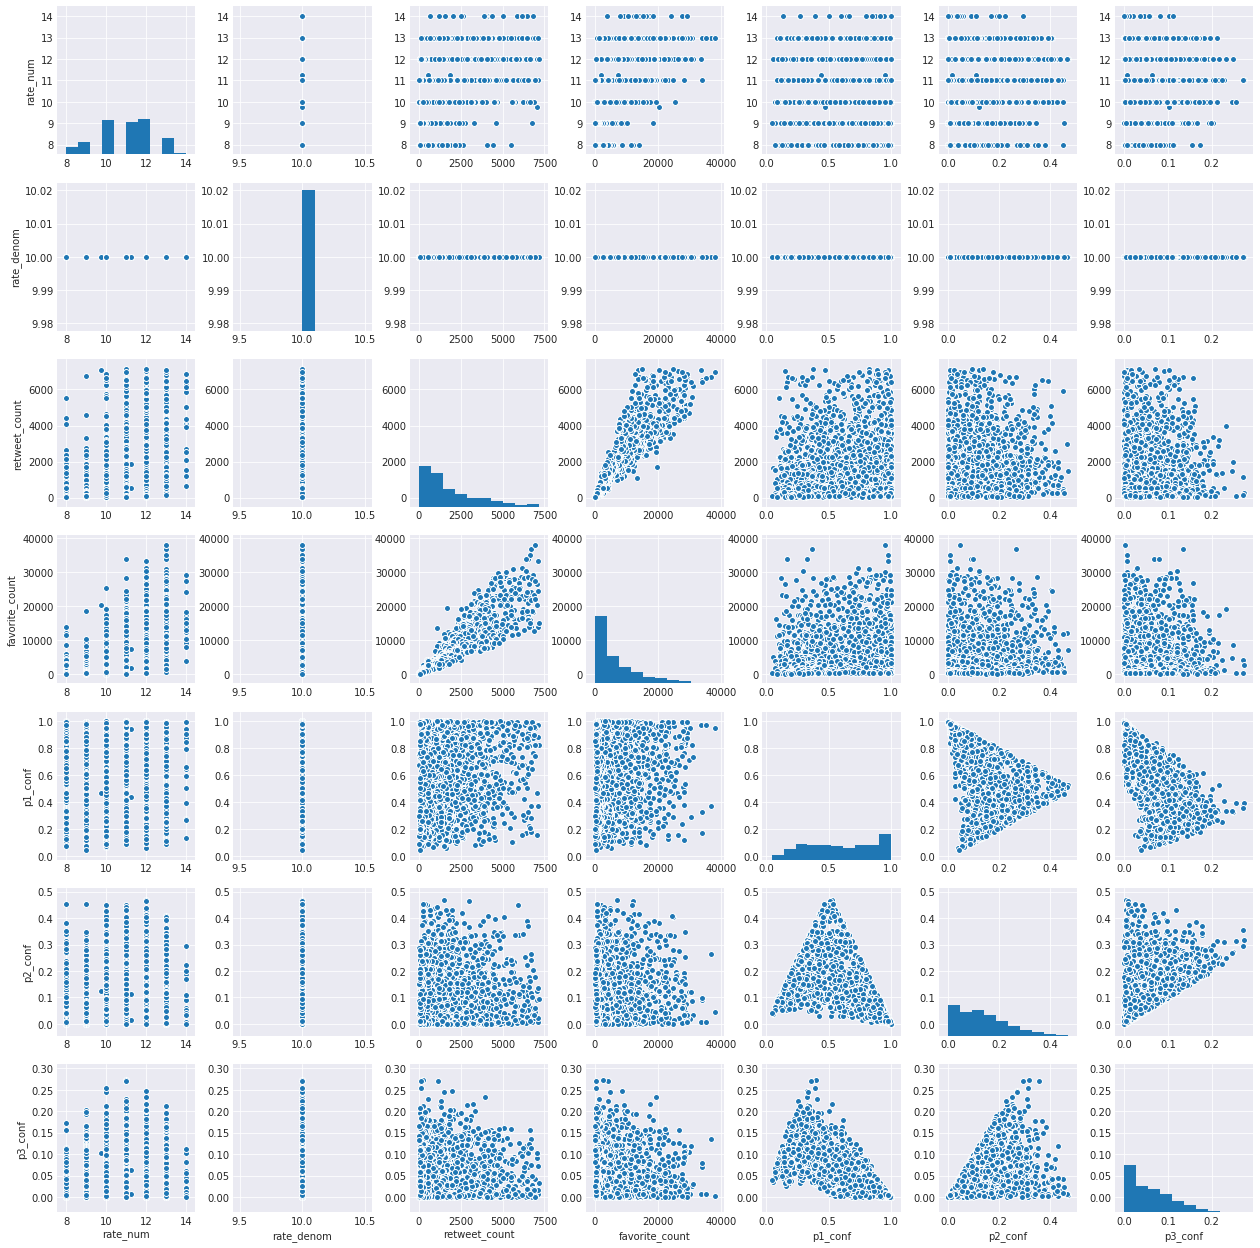

In [95]:
sns.pairplot(comp_twt_data_cc, vars=["rate_num", "rate_denom", "retweet_count", "favorite_count", "p1_conf", "p2_conf", "p3_conf"]);

### Visualization

#### 1. What dog stage got most retweets?

In [96]:
group = comp_twt_data_cc.groupby('stage')['retweet_count']
dog_stage_rtw_ratio = group.sum() / group.count()

In [97]:
dog_stage_rtw_ratio

stage
doggo      3131.218182
floofer    2816.714286
pupper     1686.159091
puppo      2730.117647
Name: retweet_count, dtype: float64

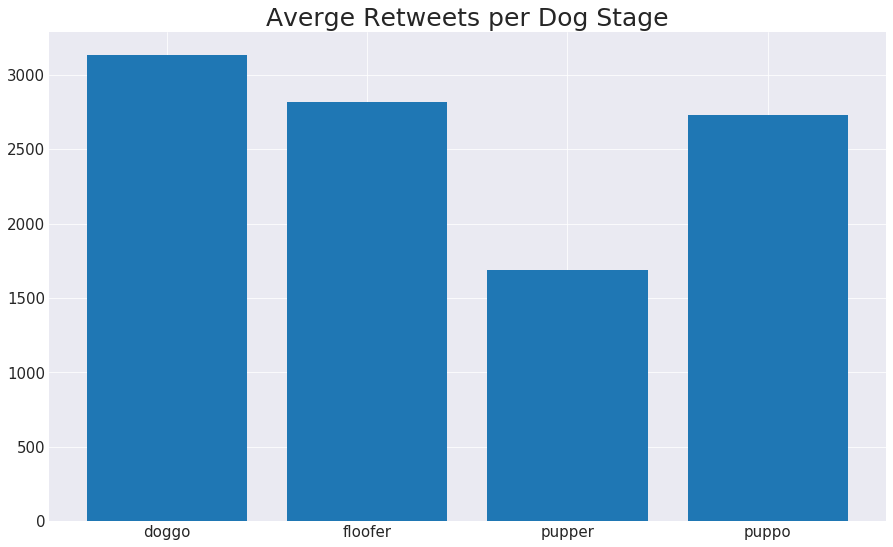

In [98]:
plt.subplots(figsize=(15,9)) 
plt.title('Averge Retweets per Dog Stage', fontsize=25)
plt.bar(x = dog_stage_rtw_ratio.index, height=dog_stage_rtw_ratio);
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

> * __Doggo__ has the most retweets on the average.

#### 2. What dog stage got most favourites?

In [99]:
group1 = comp_twt_data_cc.groupby('stage')['favorite_count']
dog_stage_fav_ratio = group1.sum() / group1.count()

In [100]:
dog_stage_fav_ratio

stage
doggo      11667.509091
floofer    10895.142857
pupper      5494.215909
puppo      11004.235294
Name: favorite_count, dtype: float64

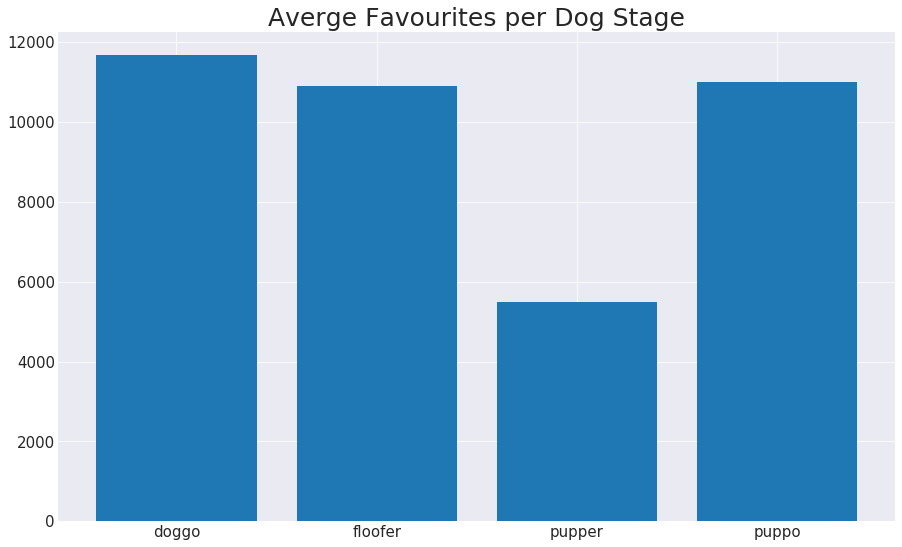

In [101]:
plt.subplots(figsize=(15,9)) 
plt.title('Averge Favourites per Dog Stage', fontsize=25)
plt.bar(x = dog_stage_fav_ratio.index, height=dog_stage_fav_ratio);
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

> * __Doggo__ has the highest favourites again on the average, this tells us that most people love this dog stage.

#### 3. What dog stage got most ratings?

In [102]:
group2 = comp_twt_data_cc.groupby('stage')
dog_stage_rate_ratio = group2['rate_num'].sum() / group2['rate_denom'].sum()

In [103]:
dog_stage_rate_ratio

stage
doggo      1.165455
floofer    1.171429
pupper     1.076858
puppo      1.164706
dtype: float64

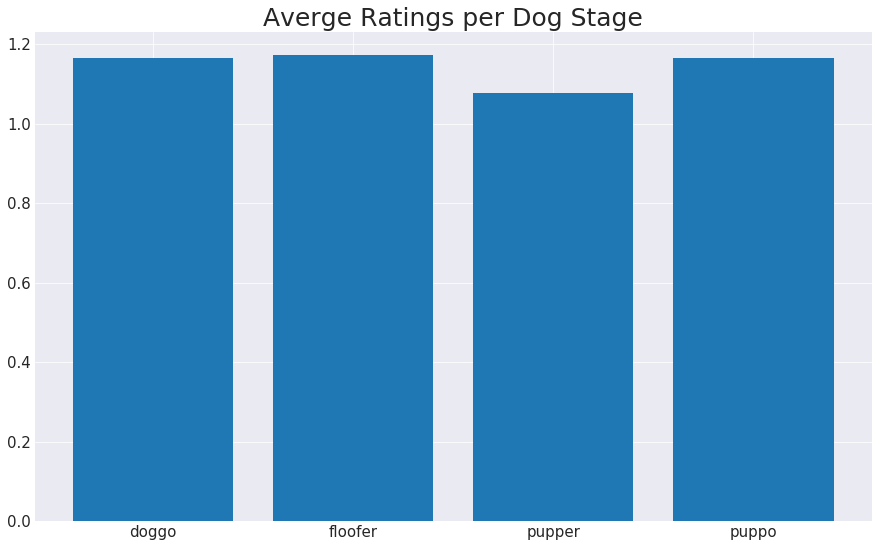

In [104]:
plt.subplots(figsize=(15,9)) 
plt.title('Averge Ratings per Dog Stage', fontsize=25)
plt.bar(x = dog_stage_rate_ratio.index, height=dog_stage_rate_ratio);
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

> * From the view of the bar chart, pupper has a lower rating than every other dog stages on the average.

#### 4. What is the 10 most favourited dog breeds?

In [105]:
group3 = comp_twt_data_cc.groupby('p1')['favorite_count']
top_ten_dog_breed = group3.sum() / group3.count()
top_ten_dog_breed = top_ten_dog_breed.sort_values(ascending=False)[:10]
top_ten_dog_breed

p1
tusker                23501.00
convertible           22798.00
marmot                21477.00
mortarboard           21029.00
australian_terrier    20011.00
home_theater          19595.25
lakeside              19154.00
dough                 18482.00
gas_pump              18139.00
syringe               18032.00
Name: favorite_count, dtype: float64

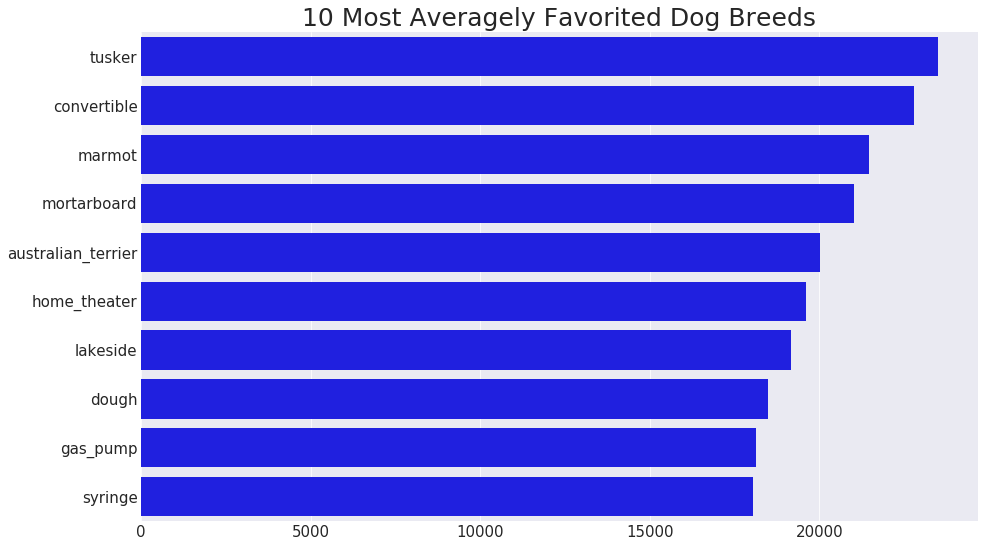

In [106]:
plt.subplots(figsize=(15,9))
plt.title('10 Most Averagely Favorited Dog Breeds', fontsize=25)
sns.barplot(x=top_ten_dog_breed, y=top_ten_dog_breed.index, order=top_ten_dog_breed.index, color='blue');
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('');
plt.ylabel('');

> * __tusker__ is the most favorited dog breed on the average and the above charts show the other top 9.

#### 5. What is the top 10 most retweeted Dog breeds?

In [107]:
group4 = comp_twt_data_cc.groupby('p1')['retweet_count']
top_ten_dog_breed_rtw = group4.sum() / group4.count()
top_ten_dog_breed_rtw = top_ten_dog_breed_rtw.sort_values(ascending=False)[:10]
top_ten_dog_breed_rtw

p1
dough                 6485.0
gas_pump              6288.0
banana                5537.0
australian_terrier    5457.0
tusker                5358.0
afghan_hound          5312.0
mortarboard           5237.0
teapot                5146.0
mousetrap             5068.0
home_theater          5058.5
Name: retweet_count, dtype: float64

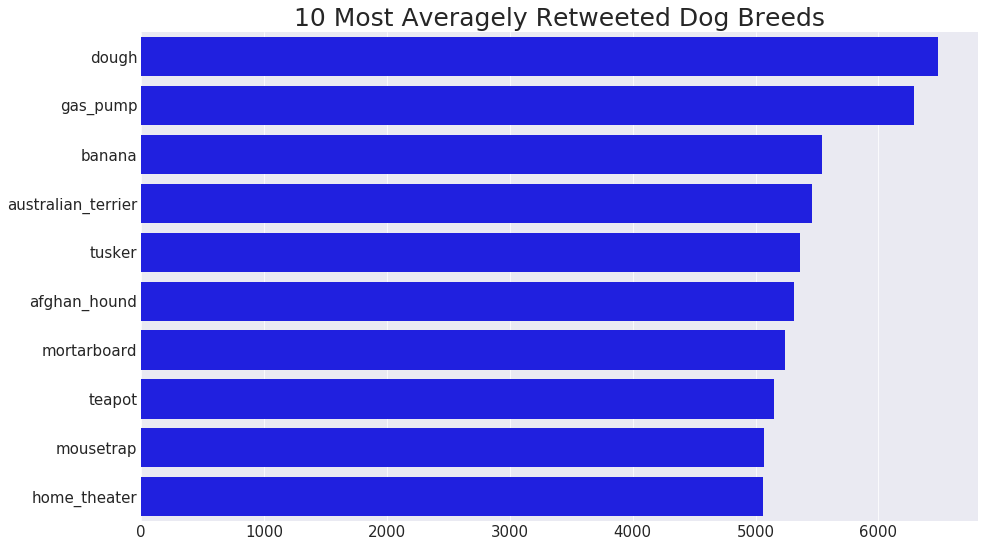

In [108]:
plt.subplots(figsize=(15,9))
plt.title('10 Most Averagely Retweeted Dog Breeds', fontsize=25)
sns.barplot(x=top_ten_dog_breed_rtw, y=top_ten_dog_breed_rtw.index, order=top_ten_dog_breed_rtw.index, color='blue');
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('');
plt.ylabel('');

> * __dough__ is the most averagely retweeted dog breed.

#### 6. What are the top 6 names that these dogs are named?
> * In case a person needs beautiful suggestion to name his/her dog

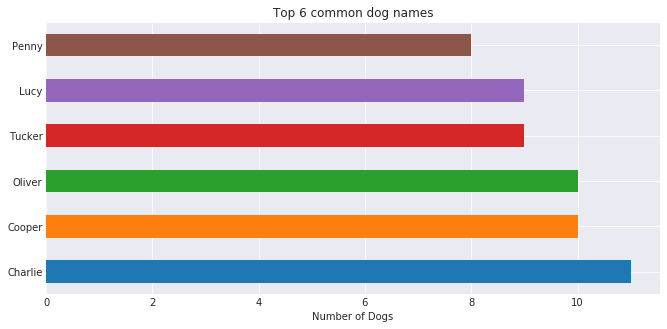

In [109]:
comp_twt_data_cc.name.value_counts()[1:7].plot('barh', figsize=(11,5), title='Top 6 common dog names').set_xlabel("Number of Dogs")
plt.show()

> * __Charlie__ is the most commong dog name based on the available dataset

#### 7. The Distribution of Dog ratings

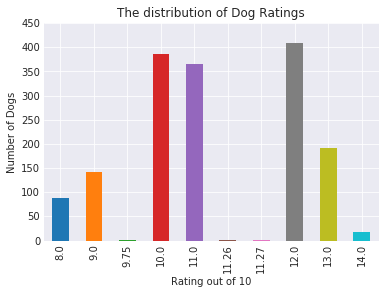

In [110]:
ax = comp_twt_data_cc.rate_num.value_counts().sort_index().plot('bar', title = 'The distribution of Dog Ratings')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
sns.set(rc={'figure.figsize':(17,10)})

> * Most of the dog ratings are 12, then followed by 10, then 11. These are the top 3 ratings in descending order.

#### 8. Checking Trends

In [111]:
# I would set new variables so the plotting code would be cleaner.

retweet_resamp = comp_twt_data_cc['retweet_count'].resample('1w').mean()
favorite_resamp = comp_twt_data_cc['favorite_count'].resample('1w').mean()

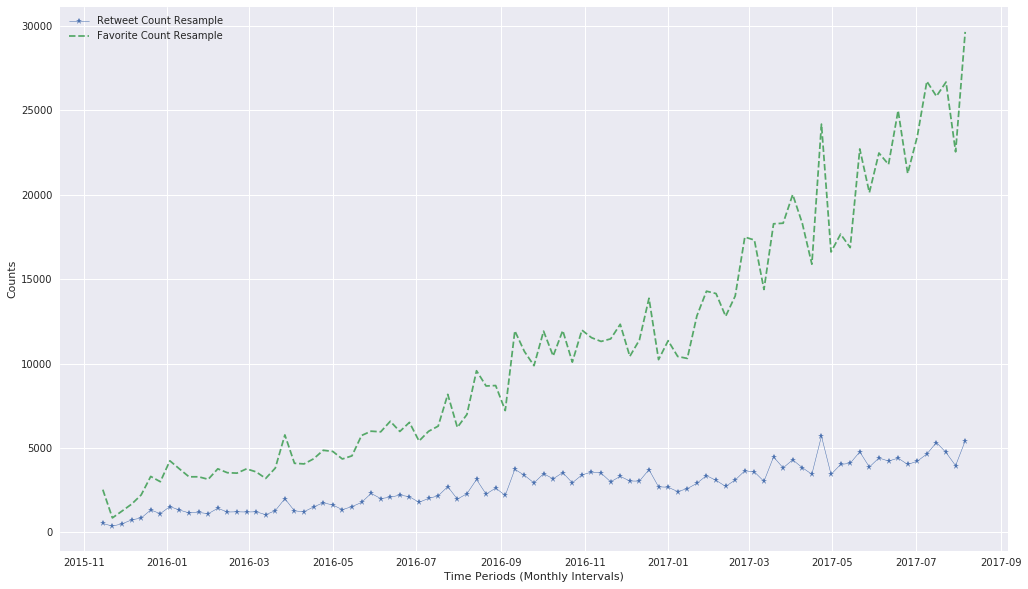

In [112]:
# plotting the resample of weekling favorite and retweet counts to show a smoother display over time.

sns.set(rc={'figure.figsize':(17, 10)})
fig, ax = plt.subplots()
ax.plot(retweet_resamp, marker='*', linestyle='-', linewidth=0.5, label='Retweet Count Resample')
ax.plot(favorite_resamp, marker='+', markersize=5, linestyle='--', label='Favorite Count Resample')
ax.set_ylabel('Counts')
ax.set_xlabel('Time Periods (Monthly Intervals)')
ax.legend();

> The time series code above was modeled after a blog post Tutorial about Time Series Analysis with Pandas. https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

#### 9. Checking for Dog breeds Vs Retweets

In [113]:
# Fetching the count of unique breeds
print('Unique Breeds of Dogs are : ', comp_twt_data_cc['p1'].nunique())

# Calculating the frequency of various breeds
comp_twt_data_cc['p1'].value_counts()
frequency = comp_twt_data_cc['p1'].value_counts().to_dict()
f= pd.DataFrame(list(frequency.items()), columns=['breed', 'frequency'])

# Filtering the Data for frequencies > 23 only
f.drop(f[f.frequency < 23].index, inplace=True)

Unique Breeds of Dogs are :  297


In [114]:
# Generating a new field "total_retweet"
total_retweet =[]
for i in f['breed']:
    t_r = comp_twt_data_cc[comp_twt_data_cc['p1'] == i]['retweet_count'].sum()
    total_retweet.append(t_r)

f['total_retweet']=total_retweet
f.head()

,breed,frequency,total_retweet
0,golden_retriever,113,261270
1,labrador_retriever,80,183691
2,pembroke,72,177478
3,chihuahua,64,109739
4,pug,47,77711


In [115]:
# Generating a new field "retweet_mean"
f['retweet_mean']=f['total_retweet']//f['frequency']
f.head()

,breed,frequency,total_retweet,retweet_mean
0,golden_retriever,113,261270,2312
1,labrador_retriever,80,183691,2296
2,pembroke,72,177478,2464
3,chihuahua,64,109739,1714
4,pug,47,77711,1653


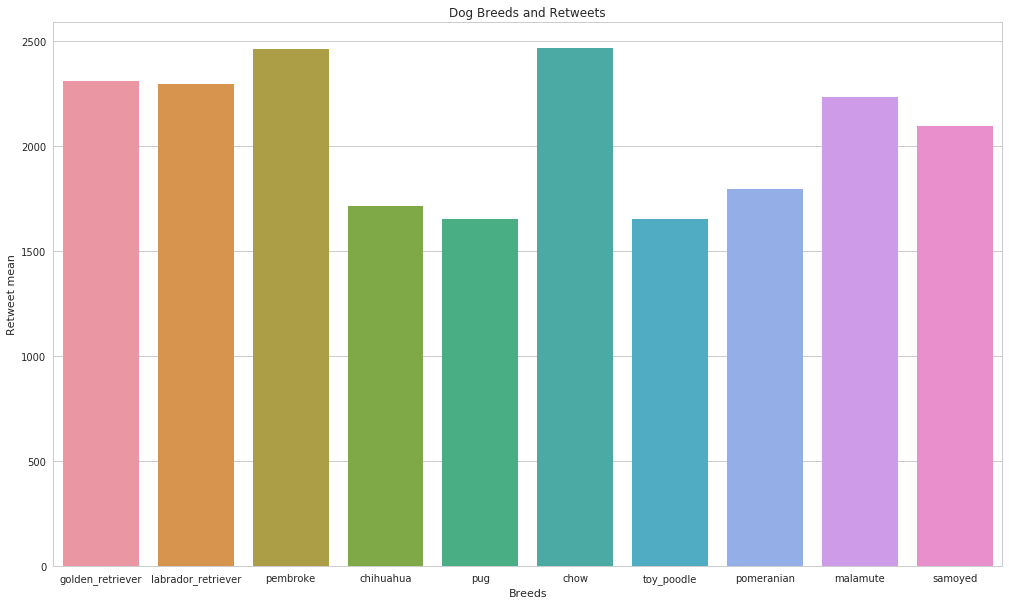

In [116]:
# Generating a graphical plot for the data
sns.set(rc={'figure.figsize':(17,10)})

# Setting up the graph layout and design
sns.set_style("whitegrid")
g = sns.barplot(x="breed", y="retweet_mean", data=f)
g.set_ylabel('Retweet mean')

# Setting the appropriate headers
plt.title('Dog Breeds and Retweets')
plt.xlabel('Breeds')

# Exporting the figure
fig =g.get_figure()

#### 10. Checking for Stages Vs Retweets

In [117]:
# Fetching the count of unique stages
print('Count of the Unique Dog breeds is : ', comp_twt_data_cc['stage'].nunique())

Count of the Unique Dog breeds is :  4


In [118]:
# Calculating the frequency of various Dog breeds
comp_twt_data_cc['stage'].value_counts()
fr = comp_twt_data_cc['stage'].value_counts().to_dict()
f= pd.DataFrame(list(fr.items()), columns=['stage', 'frequency'])
print(f)

     stage  frequency
0   pupper        176
1    doggo         55
2    puppo         17
3  floofer          7


In [119]:
# Generating a new field "total_retweet"
tot_retwt =[]
for i in f['stage']:
    t_r = comp_twt_data_cc[comp_twt_data_cc['stage'] == i]['retweet_count'].sum()
    tot_retwt.append(t_r)

f['total_retweet']=tot_retwt
f.head()

,stage,frequency,total_retweet
0,pupper,176,296764
1,doggo,55,172217
2,puppo,17,46412
3,floofer,7,19717


In [120]:
# Calculating the retweet mean
f['retweet_mean']=f['total_retweet']//f['frequency']
f.head()

,stage,frequency,total_retweet,retweet_mean
0,pupper,176,296764,1686
1,doggo,55,172217,3131
2,puppo,17,46412,2730
3,floofer,7,19717,2816


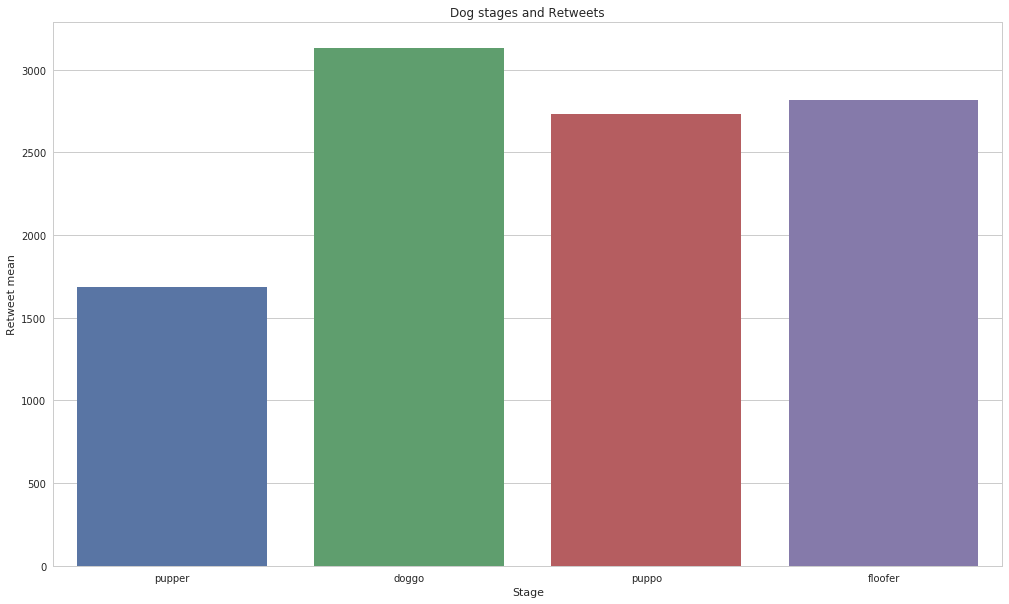

In [121]:
# Setting up the graph layout and design
sns.set_style("whitegrid")
g = sns.barplot(x="stage", y="retweet_mean", data=f)
g.set_ylabel('Retweet mean')

# Setting the appropriate headers
plt.title('Dog stages and Retweets')
plt.xlabel('Stage')

# Exporting the figure
fig =g.get_figure()

### Word Cloud with Tweets
* A word cloud is a fun tool that lets user take the most frequently used words from a text, in this case, the tweets used in the dataset, and display in a fun image

> First I created a list with all the words that were tweeted in my DataFrame.

In [122]:
# download the needed libraries
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [123]:
tweets = np.array(comp_twt_data_cc.text)
my_list = []
for tweet in tweets:
    my_list.append(tweet.replace("\n",""))

> Next, I downloaded an image of a house print from the internet and used it in the function below to generate a word cloud with the tweets.

In [124]:
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))
text = my_list

In [125]:
def gen_wc(text, mask):
    word_cloud = WordCloud(width = 500, height = 500, background_color='white', mask=mask).generate(str(text))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='red')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

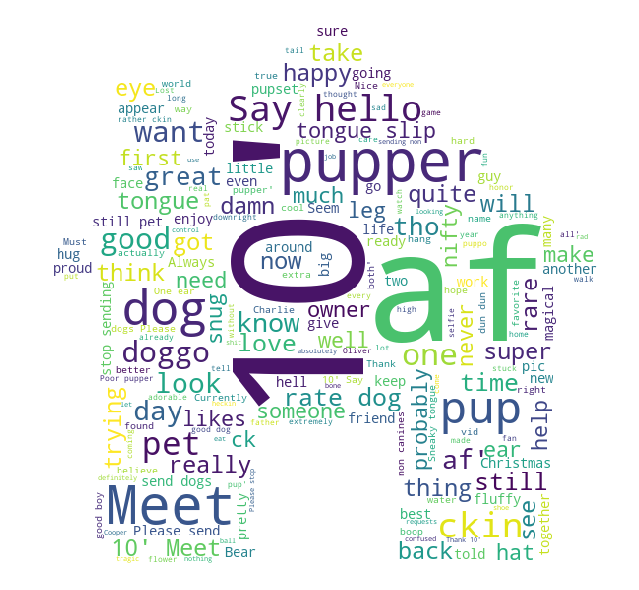

In [126]:
gen_wc(text, mask)

> * The code used above was modeled from this blog on how to generate a word cloud in python. https://blog.goodaudience.com/how-to-generate-a-word-cloud-of-any-shape-in-python-7bce27a55f6e

### Insights:
1. Among the 4 dog stages, __pupper__ has the highest frequency, but __doggo__ gets the highest favourite count, while __floofer__ has the highest dog rating.


2. Though __pupper__ has the highest frequency, it gets the lowest favorite counts, retweet counts and ratings.


3. As seen again (just as mentioned before), with this timeseries chart above, the favorite_count and retweet_count are positively correlated with one another.  And I think this is due to the fact that most people retweet 'tweets' that they like in order for others to see it.  *It is like 'free advertising' for the 'tweet' itself and shows people on your feed what you're interested in. It's a sharing feature when you want others to see something you've read/seen.*


4. According to the chart, there are 3 spikes at specific times of year, those being, the middle of spring into summer, and then the Christmas/Holiday time. This is most likely due to the fact that people with dogs are more active in the warmer months, posting cute things their dog is doing outside. Also, during the holidays, they are more likely to share pics/etc about things they care about during this time i.e. their dogs.

5. The overall trend of the counts shows the popularity of this twitter page slowly growing overtime. If the number of followers were taken into account, it would most likely show a similar trend since the twitter account is getting more "air time."

## Conclusions

* In conclusion, I find that doggo has the highest retweets and favourites on a average. while pupper has the highest frequency and floofer has the highest dog rating. All dog stages have almost similar ratings by owner of @dog_rates between 1.0 - 1.17.

* On the average also, __tusker__ is the most favourited dog breed, but __dough__ is the most retweeted, and lastly there is a lot of common words such as: Say hello, happy, Meet, love and so on